In [2]:
from sympy import init_printing, symbols, Eq, Function
from sympy.plotting import plot

init_printing(use_latex='mathjax')


In [3]:
t = symbols('t', real=True)

x = Function('x')

diffeq = Eq(x(t).diff(t), -x(t))
diffeq

d               
──(x(t)) = -x(t)
dt              

In [4]:
from sympy import dsolve

gen_sol_1 = dsolve(diffeq, x(t))
gen_sol_1

           -t
x(t) = C₁⋅ℯ  

In [5]:
from sympy import solveset
t0,x0 = symbols('t0 x0', real=True)
C1 = symbols('C1')

C_1 = solveset(gen_sol_1.subs([(t, t0), (x(t0), x0)]), C1)

C_1.args[0]

    t₀
x₀⋅ℯ  

In [6]:
par_sol_1 = gen_sol_1.subs(C1, C_1.args[0])
par_sol_1

           -t  t₀
x(t) = x₀⋅ℯ  ⋅ℯ  

In [7]:
m,g = symbols('m g', real=True, positive=True)

eom_free_fall = Eq(m*x(t).diff(t,2), -m*g)
eom_free_fall

    2             
   d              
m⋅───(x(t)) = -g⋅m
    2             
  dt              

In [8]:
gen_sol_2 = dsolve(eom_free_fall, x(t))
gen_sol_2

                      2
                   g⋅t 
x(t) = C₁ + C₂⋅t - ────
                    2  

In [9]:
diff_gen_sol_2 = Eq(gen_sol_2.lhs.diff(t), gen_sol_2.rhs.diff(t))
diff_gen_sol_2

d                  
──(x(t)) = C₂ - g⋅t
dt                 

In [10]:
from sympy import linsolve

C2, h = symbols('C2 h')

C_2 = linsolve([gen_sol_2, diff_gen_sol_2], (C1, C2))
C_2 = C_2.subs([(x(t).diff(t),0), (t, 0), (x(0), h)])
C_2 = [(C1, C_2.args[0][0]), (C2, C_2.args[0][1])]

C_2

[(C₁, h), (C₂, 0)]

In [11]:
par_sol_2 = gen_sol_2.subs(C_2)
par_sol_2

            2    
         g⋅t     
x(t) = - ──── + h
          2      

In [12]:
dsolve(eom_free_fall,x(t),
       ics = {x(0):h, x(t).diff(t).subs(t,0):0})

            2    
         g⋅t     
x(t) = - ──── + h
          2      

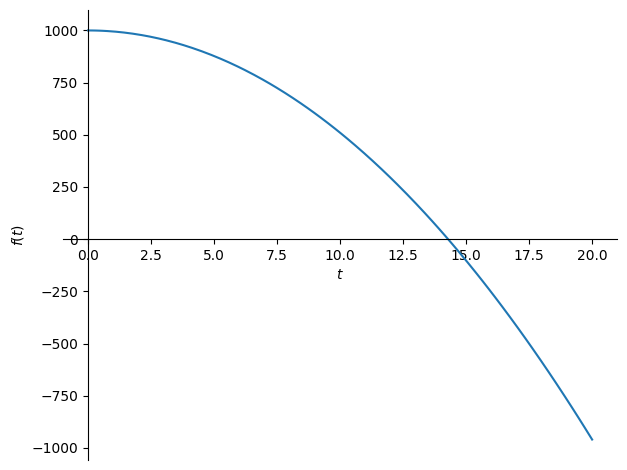

In [13]:
const_free_fall = [(g, 9.8), (h, 1000)]
plot(par_sol_2.rhs.subs(const_free_fall),(t,0, 20))

In [14]:
D = symbols('D', real=True, positive=True)

eom_free_fall_w_res = Eq(m*x(t).diff(t,2), -m*g - D*x(t).diff(t))
eom_free_fall_w_res

    2                           
   d              d             
m⋅───(x(t)) = - D⋅──(x(t)) - g⋅m
    2             dt            
  dt                            

In [15]:
gen_sol_3 = dsolve(eom_free_fall_w_res, x(t))
gen_sol_3

                -D⋅t         
                ─────        
                  m     g⋅m⋅t
x(t) = C₁ + C₂⋅ℯ      - ─────
                          D  

In [16]:
from sympy import simplify
par_sol_3 = dsolve(eom_free_fall_w_res, x(t), ics= {x(0):h, x(t).diff(t).subs(t, 0):0})
simplify(par_sol_3)

                                -D⋅t 
                                ─────
                      2      2    m  
           g⋅m⋅t   g⋅m    g⋅m ⋅ℯ     
x(t) = h - ───── + ──── - ───────────
             D       2          2    
                    D          D     

In [17]:
par_sol_3.rhs.diff(t)

             -D⋅t 
             ─────
               m  
  g⋅m   g⋅m⋅ℯ     
- ─── + ──────────
   D        D     

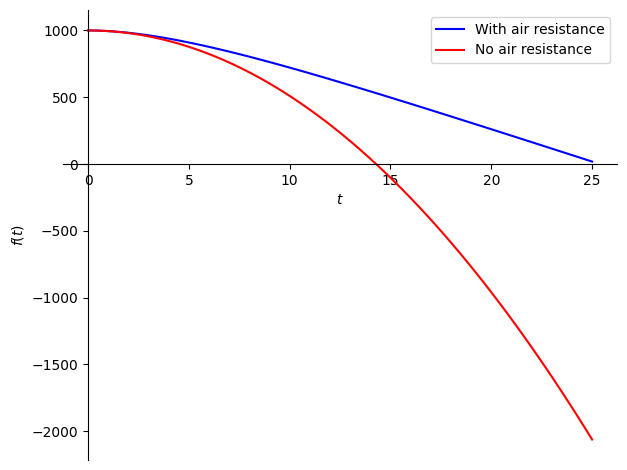

In [18]:
const_free_fall_res = [(g, 9.8), (h, 1000), (D, 0.2), (m,1)]
p = plot(par_sol_3.rhs.subs(const_free_fall_res),
         par_sol_2.rhs.subs(const_free_fall),
         (t, 0, 25), show=False, legend=True)
p[0].label = 'With air resistance'
p[1].label = 'No air resistance'

p[0].line_color = 'b'
p[1].line_color = 'r'
p.show()

In [19]:
k = symbols('k', real=True, positive=True)
v0, v1 = symbols('v0 v1', real=True)

eom_simp_hosc = Eq(m*x(t).diff(t,2), -k*x(t))

eom_simp_hosc

    2                
   d                 
m⋅───(x(t)) = -k⋅x(t)
    2                
  dt                 

In [20]:
gen_sol_4 = dsolve(eom_simp_hosc, x(t))
gen_sol_4

             ⎛√k⋅t⎞         ⎛√k⋅t⎞
x(t) = C₁⋅sin⎜────⎟ + C₂⋅cos⎜────⎟
             ⎝ √m ⎠         ⎝ √m ⎠

In [21]:
par_sol_4 = dsolve(eom_simp_hosc, x(t), ics={x(0):x0, x(t).diff(t).subs(t, 0):v0})
par_sol_4

                               ⎛√k⋅t⎞
                      √m⋅v₀⋅sin⎜────⎟
             ⎛√k⋅t⎞            ⎝ √m ⎠
x(t) = x₀⋅cos⎜────⎟ + ───────────────
             ⎝ √m ⎠          √k      

In [22]:
w_0 = symbols('\omega_0', real=True, positive=True)
par_sol_4_omega =par_sol_4.subs(k, m*w_0**2)
par_sol_4_omega

                           v₀⋅sin(\omega₀⋅t)
x(t) = x₀⋅cos(\omega₀⋅t) + ─────────────────
                                \omega₀     

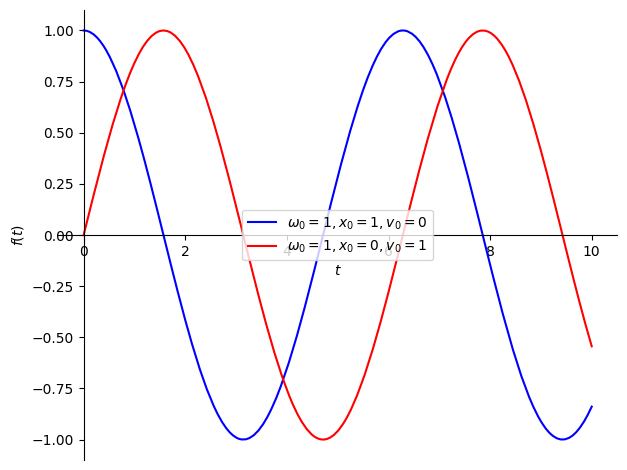

In [23]:
const_simp_hosc = [[(w_0, 1), (x0, 1), (v0, 0)],
                   [(w_0, 1), (x0, 0), (v0,1)]]

p = plot(par_sol_4_omega.rhs.subs(const_simp_hosc[0]),
         par_sol_4_omega.rhs.subs(const_simp_hosc[1]),
         (t,0,10),legend=True,show=False)

p[0].label = '$\omega_0=1, x_0=1, v_0=0$'
p[1].label = '$\omega_0=1, x_0=0, v_0=1$'
p[0].line_color = 'b'
p[1].line_color = 'r'

p.show()

In [24]:
a, K = symbols('a K', real=True)
p = symbols('p', cls=Function, real=True)

logistic_eq = Eq(p(t).diff(t), a*p(t)*(1-p(t)/K))
logistic_eq

d            ⎛    p(t)⎞     
──(p(t)) = a⋅⎜1 - ────⎟⋅p(t)
dt           ⎝     K  ⎠     

In [25]:
solveset(logistic_eq.rhs, p(t))

{0, K}

In [27]:
#一般解の計算
gen_sol_logistic = dsolve(logistic_eq, p(t))
gen_sol_logistic

           C₁⋅K + a⋅t 
        K⋅ℯ           
p(t) = ───────────────
        C₁⋅K + a⋅t    
       ℯ           - 1

In [28]:
#人口初期値
p0 = symbols('p0', positive=True)
#特殊解
par_sol_logistic = dsolve(logistic_eq, p(t),
                          ics= {p(t0):p0})

par_sol_logistic

                    a⋅t  -a⋅t₀       
              K⋅p₀⋅ℯ   ⋅ℯ            
p(t) = ──────────────────────────────
                 ⎛    a⋅t  -a⋅t₀    ⎞
                 ⎜p₀⋅ℯ   ⋅ℯ         ⎟
       (-K + p₀)⋅⎜────────────── - 1⎟
                 ⎝   -K + p₀        ⎠

In [29]:
from sympy import limit, oo
limit(par_sol_logistic.rhs.subs(a, 0.1), t, oo)

K

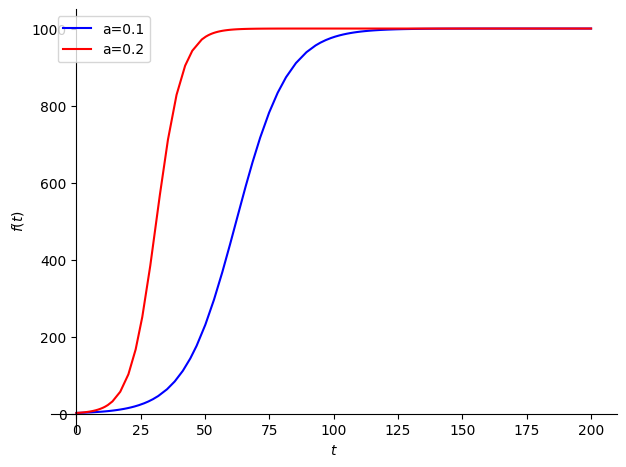

In [32]:
const_logistic = [ {t0:0.0, p0:2, a:0.1, K:1000},
                  {t0:0, p0:2, a:0.2, K:1000}]

p = plot(par_sol_logistic.rhs.subs(const_logistic[0]),
         par_sol_logistic.rhs.subs(const_logistic[1]),
         (t,0,200), legend=True, show=False)


p[0].label = 'a=0.1'
p[1].label = 'a=0.2'

p[0].line_color = 'b'
p[1].line_color = 'r'

p.show()

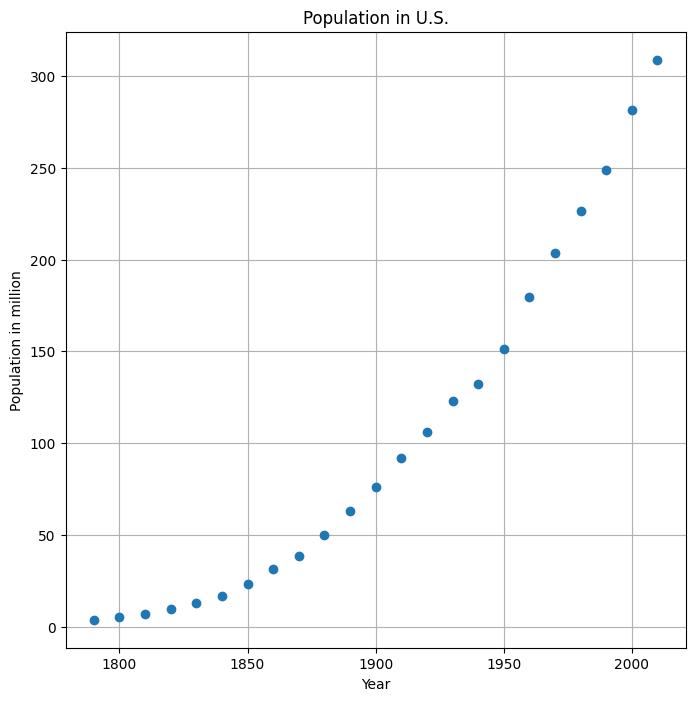

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data_us_population = np.loadtxt('../data/us_population.csv', delimiter=',')

year = data_us_population[:,0]
us_pop = data_us_population[:,1] / 1000

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.plot(year, us_pop, marker='o', linestyle='None')
ax.set_title('Population in U.S.')
ax.set_xlabel('Year')
ax.set_ylabel('Population in million')
ax.grid()
plt.show()

In [34]:
from scipy.optimize import curve_fit
from sympy import lambdify

initial_val_logistic = {t0:year[0], p0:us_pop[0]}

f = lambdify((t,a,K), 
             par_sol_logistic.rhs.subs(initial_val_logistic))

In [35]:
param, cov = curve_fit(f, year, us_pop, p0 = [0.05, 400])


In [36]:
{a: param[0],K:param[1]}

{K: 369.55289349063355, a: 0.026788906276377793}

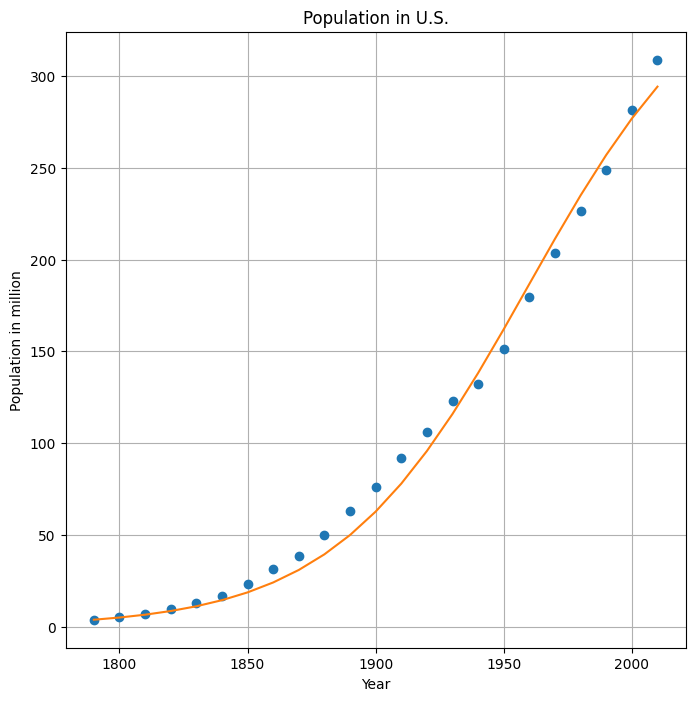

In [38]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(year, us_pop, marker='o', linestyle='None')
ax.plot(year, f(year, param[0], param[1]))
ax.set_title('Population in U.S.')
ax.set_xlabel('Year')
ax.set_ylabel('Population in million')
ax.grid()

plt.show()
